<a href="https://colab.research.google.com/github/StephSL9/Exploratory-data-analysis/blob/main/World_happiness_report_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the library needed
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('World Happiness Report.csv')

In [ ]:
df.dtypes

Country Name                          object
Regional Indicator                    object
Year                                   int64
Life Ladder                          float64
Log GDP Per Capita                   float64
Social Support                       float64
Healthy Life Expectancy At Birth     float64
Freedom To Make Life Choices         float64
Generosity                           float64
Perceptions Of Corruption            float64
Positive Affect                      float64
Negative Affect                      float64
Confidence In National Government    float64
dtype: object

In [ ]:
df.shape

(2199, 13)

In [ ]:
df.isnull().sum()

Country Name                           0
Regional Indicator                   112
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    20
Social Support                        13
Healthy Life Expectancy At Birth      54
Freedom To Make Life Choices          33
Generosity                            73
Perceptions Of Corruption            116
Positive Affect                       24
Negative Affect                       16
Confidence In National Government    361
dtype: int64

In [ ]:
# Data cleaning by removing the rows with null value
df.dropna(inplace = True)

In [ ]:
# Checking whether null values was removed
df.shape

(1683, 13)

In [ ]:
# Getting a general description of how the columns relate with each other
df.corr()

<ipython-input-9-ceafac50e771>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
Year,1.000000,0.071749,0.101946,0.007045,0.183644,0.245680,-0.008085,-0.106063,0.015243,0.246212,0.030618
Life Ladder,0.071749,1.000000,0.792572,0.720615,0.735161,0.542297,0.193739,-0.492163,0.512842,-0.309755,-0.068647
Log GDP Per Capita,0.101946,0.792572,1.000000,0.701313,0.834306,0.386081,-0.005916,-0.391091,0.246365,-0.268648,-0.183112
Social Support,0.007045,0.720615,0.701313,1.000000,0.606491,0.429717,0.071150,-0.249762,0.453113,-0.430832,-0.160869
Healthy Life Expectancy At Birth,0.183644,0.735161,0.834306,0.606491,1.000000,0.399726,0.025713,-0.337034,0.249245,-0.136442,-0.172104
Freedom To Make Life Choices,0.245680,0.542297,0.386081,0.429717,0.399726,1.000000,0.319194,-0.506642,0.572970,-0.239396,0.422720
Generosity,-0.008085,0.193739,-0.005916,0.071150,0.025713,0.319194,1.000000,-0.289985,0.321720,-0.096840,0.295769
Perceptions Of Corruption,-0.106063,-0.492163,-0.391091,-0.249762,-0.337034,-0.506642,-0.289985,1.000000,-0.307226,0.284118,-0.455981
Positive Affect,0.015243,0.512842,0.246365,0.453113,0.249245,0.572970,0.321720,-0.307226,1.000000,-0.293541,0.126667
Negative Affect,0.246212,-0.309755,-0.268648,-0.430832,-0.136442,-0.239396,-0.096840,0.284118,-0.293541,1.000000,-0.144801


# Creating and fitting a statistic model for the predition of happiness score

In [ ]:
# Separating the dataset into training set and testing set

from sklearn.model_selection import train_test_split
# Using the top 5 correlated columns as the varibles for prediction
x = df[['Log GDP Per Capita','Social Support','Healthy Life Expectancy At Birth','Freedom To Make Life Choices','Perceptions Of Corruption','Positive Affect']]
y = df['Life Ladder']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LinearRegression

# Fitting the training data to develop a linear regression model
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
lm.score(x_test,y_test)

0.7673436221796294

In [ ]:
lm.score(x_train,y_train)

0.7823246556153205

In [ ]:
from sklearn.model_selection import cross_val_score

#Cross validating the R score of the model
Rcross = cross_val_score(lm, x, y, cv=4)
Rcross

array([0.79188198, 0.75470405, 0.739619  , 0.7527233 ])

In [ ]:
#Getting the predicted value from the model for graph ploting
yhat_train = lm.predict(x_train)
yhat_train[0:5]

array([5.89634161, 5.91343277, 5.86097455, 5.40750246, 6.14607   ])

In [ ]:
yhat_test = lm.predict(x_test)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Generate a function to plot the difference between the distribution of predicted value and original value from the data
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Life Ladder')
    plt.ylabel('Proportion')

    plt.show()
    plt.close()

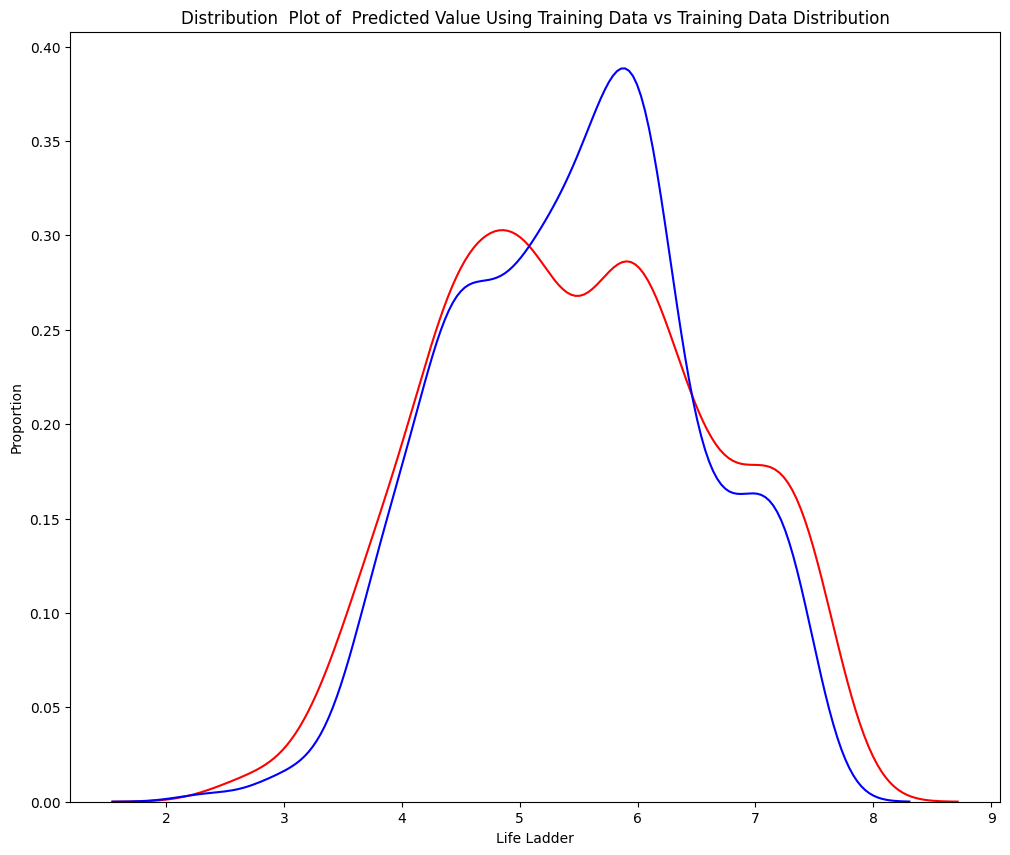

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

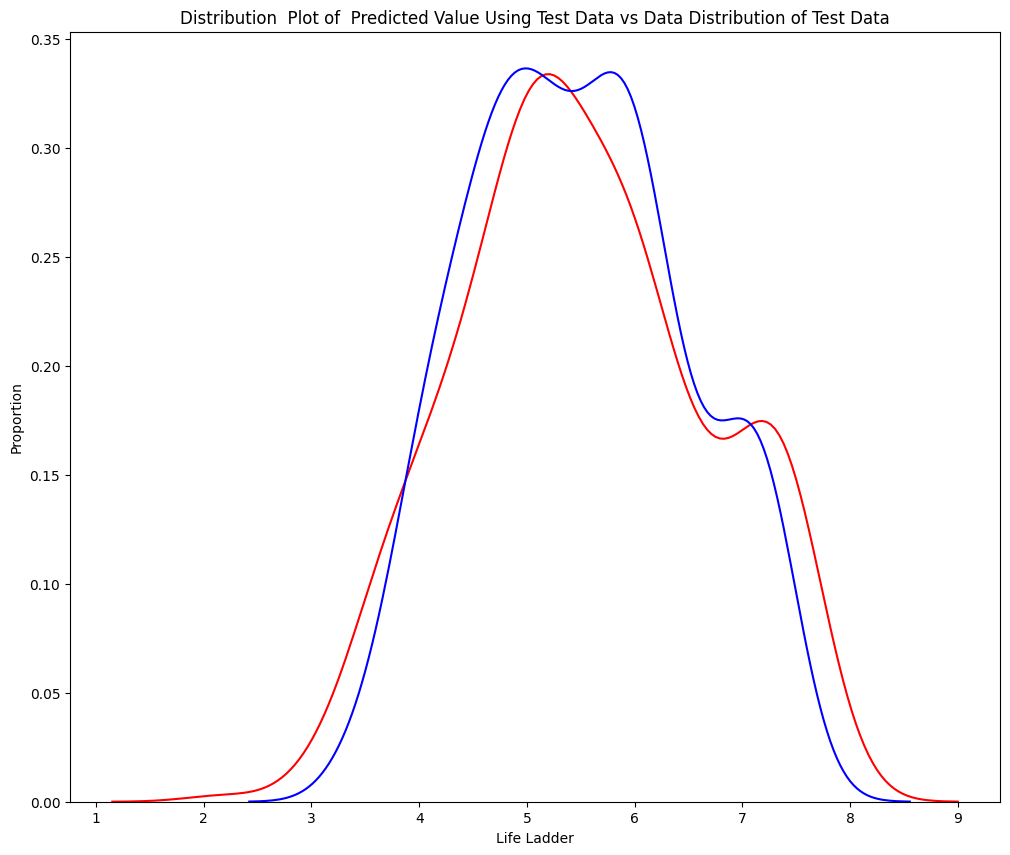

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Ridge(alpha=1) order: 1
0.7693400070692057
Ridge(alpha=100) order: 2
0.7830155832642278


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.68191e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.04272e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.01459e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.97543e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=1) order: 3
0.8076434160429478


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.1817e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.11717e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.19444e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.26645e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill

Ridge(alpha=100) order: 4
0.8158488066963535


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.25603e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.44561e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.76541e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.90724e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Il

Ridge(alpha=0.001) order: 5
0.879387862663124


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.35687e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.13166e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.21757e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.17652e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Il

Ridge(alpha=0.1) order: 6
0.8864739443159619


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:255: UserW

Ridge(alpha=0.001) order: 7
0.8183945031157227


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:255: UserW

Ridge(alpha=0.001) order: 8
0.5493430900177518


Text(0.5, 1.0, 'R^2 Using Test Data')

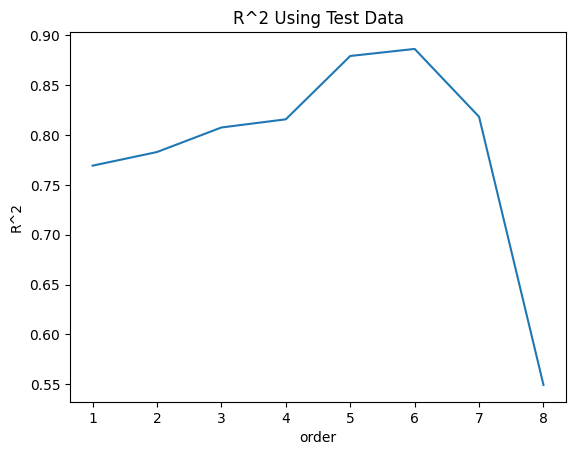

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

Rsqu_test = []

# Finding the best combination of model tuning method (polynomial regression and ridge regression)
order = [1, 2, 3, 4, 5, 6, 7, 8]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_pr = pr.fit_transform(x)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)    

    parameters1= [{'alpha': [0.001,0.1,1, 10, 100]}]
    parameters1
    RR = Ridge()

    Grid1 = GridSearchCV(RR, parameters1,cv=4)
    Grid1.fit(x_pr, y)

    BestRR=Grid1.best_estimator_
    print(BestRR, "order:" ,n)

    print(BestRR.score(x_test_pr, y_test)) 
    
    #lm.fit(x_train_pr, y_train)
    
    #Rsqu_test.append(lm.score(x_test_pr, y_test))
    Rsqu_test.append(BestRR.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Tuning the model (degree 6 polynomial transform and apply an alpha value of 0.1)
pr = PolynomialFeatures(degree=6)
x_pr = pr.fit_transform(x)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)    

RR = Ridge(alpha=0.1)

RR.fit(x_pr, y)

print(RR)

print(RR.score(x_test_pr, y_test))

yhat_test1 = RR.predict(x_test_pr)

Ridge(alpha=0.1)
0.8864739443159619


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.73012e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


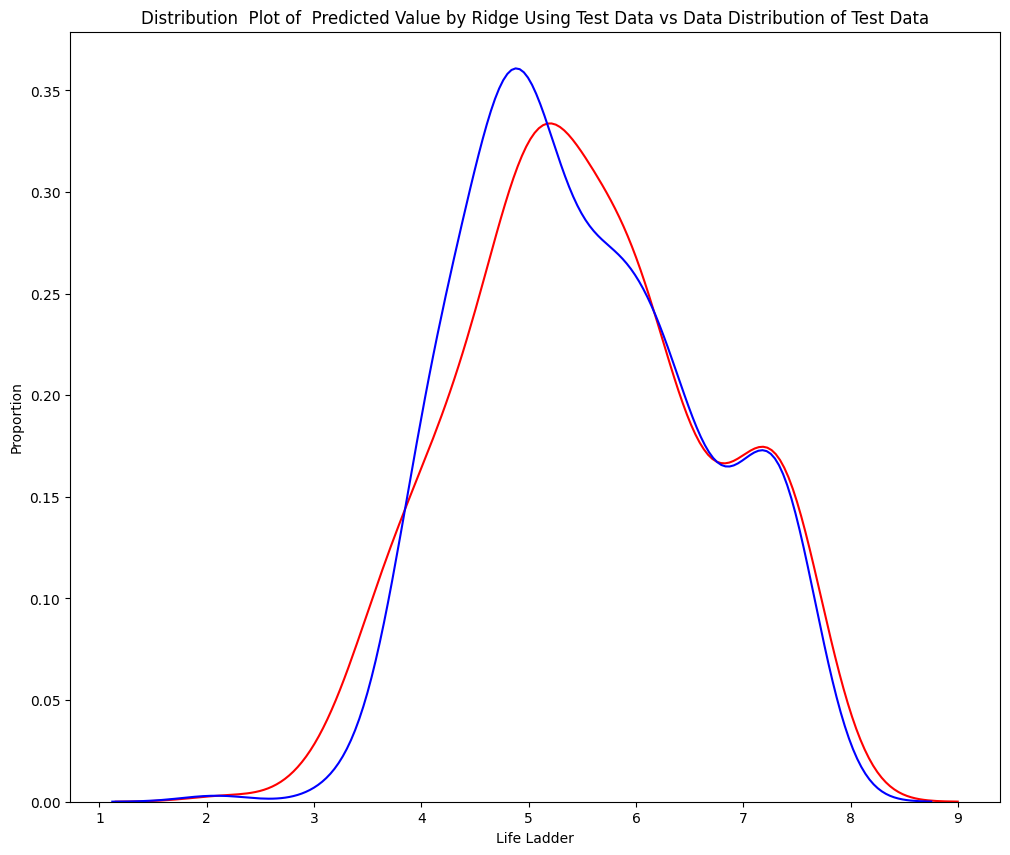

In [ ]:
Title='Distribution  Plot of  Predicted Value by Ridge Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test1,"Actual Values (Test)","Predicted Values (Test)",Title)